In [1]:
%cd ../

/home/zulqarnain/feature_evaluations/htfatorch


In [2]:
import logging
import os
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import nilearn
import numpy as np

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/dataset/util.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import OrderedDict, Sequence
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/zulqarnain

In [3]:
drop_data = '/data/zulqarnain/synthetic_data_multidistz_reconstructed/'
if not os.path.isdir(drop_data):
    os.makedirs(drop_data)

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
synthetic_db = niidb.FMriActivationsDb('data/synthetic_data_multidistz_norest_wholebrain.db', mask='/data/zulqarnain/wholebrain.nii.gz')
dtfa = DTFA.DeepTFA(synthetic_db.all(), mask='/data/zulqarnain/wholebrain.nii.gz',
                    num_factors=3, embedding_dim=2)

07/30/2019 13:00:58 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_10_task_2_stimulus_1.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
07/30/2019 13:00:58 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_10_task_2_stimulus_2.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.


07/30/2019 13:01:01 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_11_task_3_stimulus_1.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
07/30/2019 13:01:01 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_11_task_3_stimulus_2.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.


07/30/2019 13:01:03 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_13_task_2_stimulus_1.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
07/30/2019 13:01:04 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_13_task_2_stimulus_2.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.


07/30/2019 13:01:06 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_14_task_3_stimulus_1.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
07/30/2019 13:01:06 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_14_task_3_stimulus_2.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.


07/30/2019 13:01:09 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_1_task_2_stimulus_1.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
07/30/2019 13:01:09 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_1_task_2_stimulus_2.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Us

07/30/2019 13:01:11 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_2_task_3_stimulus_1.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
07/30/2019 13:01:11 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_2_task_3_stimulus_2.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Us

07/30/2019 13:01:14 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_4_task_2_stimulus_1.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
07/30/2019 13:01:14 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_4_task_2_stimulus_2.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Us

07/30/2019 13:01:16 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_5_task_3_stimulus_1.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
07/30/2019 13:01:16 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_5_task_3_stimulus_2.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Us

07/30/2019 13:01:19 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_7_task_2_stimulus_1.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
07/30/2019 13:01:19 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_7_task_2_stimulus_2.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Us

07/30/2019 13:01:22 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_8_task_3_stimulus_1.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
07/30/2019 13:01:22 Loading Nifti image /data/zulqarnain/synthetic_data_multidist_zscored_blocked/nifti_files/subject_8_task_3_stimulus_2.nii with mask /data/zulqarnain/wholebrain.nii.gz (zscore=False, smooth=None)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Us

/home/zulqarnain/feature_evaluations/htfatorch/htfa_torch/utils.py:210: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  widths = np.expand_dims(widths, 1)
/home/zulqarnain/feature_evaluations/htfatorch/htfa_torch/utils.py:210: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  widths = np.expand_dims(widths, 1)
/home/zulqarnain/feature_evaluations/htfatorch/htfa_torch/utils.py:210: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  widths = np.expand_dims(widths, 1)


In [6]:
dtfa.load_state('data/synthetic_multidist_n1000_k3_07302019_123542')

In [7]:
dtfa.free_energy(batch_size=1000,blocks_batch_size=1000,use_cuda=True)

[[23381562.0, -23377776.0, 3785.802001953125],
 [23381676.0, -23377700.0, 3880.153564453125]]

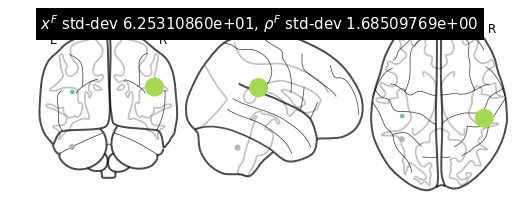

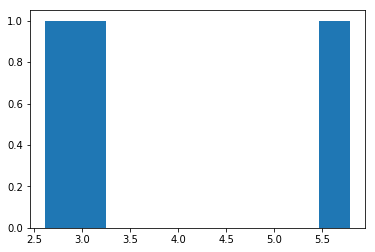

(<nilearn.plotting.displays.OrthoProjector at 0x7f2711cfb2e8>,
 tensor([[-37.7744, -28.8239,  18.5125],
         [ 48.5493, -31.1808,  23.6996],
         [-38.2875, -53.2317, -39.4756]]),
 tensor([2.6143, 5.7902, 3.2254]))

In [8]:
dtfa.visualize_factor_embedding(filename='factor_embedding_init')

In [9]:
def task_rest_labeler(task):
    if 'rest' in str(task):
        return 'Rest'
    elif 'baseline' in str(task):
        return 'Baseline'
    else:
        return 'Task'

In [10]:
Group_1_last = 5
Group_2_last = 10
def subject_labeler(subject):
    if subject >= 1 and subject <= Group_1_last:
        condition = 0
    elif subject > Group_1_last and subject <= Group_2_last:
        condition = 1
    else:
        condition = 2
    if condition == 0:
        return 'Group 1'
    elif condition == 1:
        return 'Group 2'
    else:
        return 'Group 3'

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


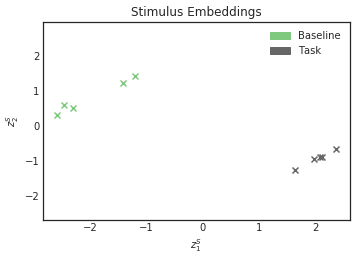

In [11]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler, filename='stimuli_embedding_means', plot_ellipse=False)

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


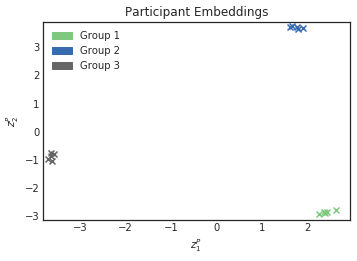

In [12]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, filename='participant_embedding_means', plot_ellipse=False)

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


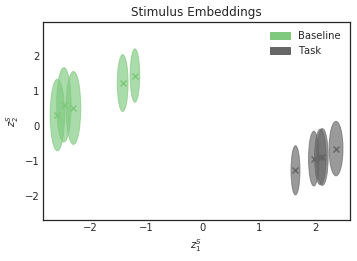

In [13]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler, filename='stimuli_embedding_cov', plot_ellipse=True)

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


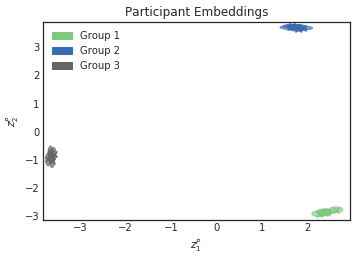

In [14]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, filename='participant_embedding_cov', plot_ellipse=True)

In [15]:
def synthetic_multidist_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_rest_labeler(block.task)
    return subject + ', ' + task + ' stimulus'

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


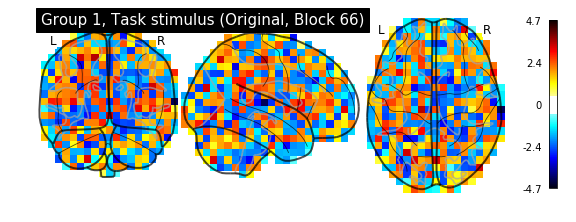

07/30/2019 13:01:58 Reconstruction Error (Frobenius Norm): 3.17238190e+02 out of 3.22440063e+02


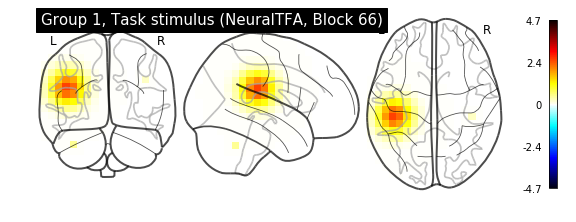

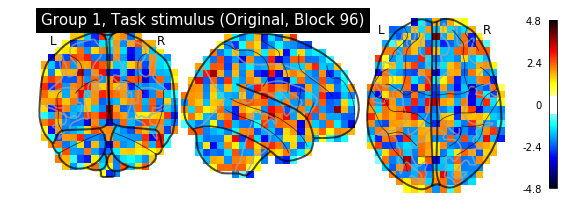

07/30/2019 13:02:02 Reconstruction Error (Frobenius Norm): 3.20003235e+02 out of 3.24489502e+02


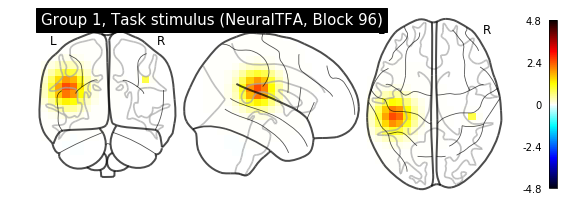

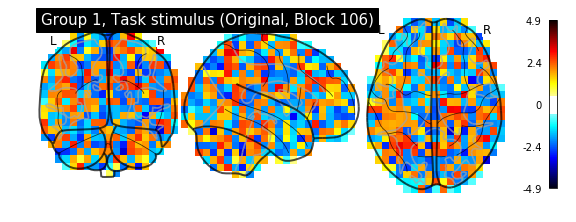

07/30/2019 13:02:06 Reconstruction Error (Frobenius Norm): 3.18837463e+02 out of 3.23378754e+02


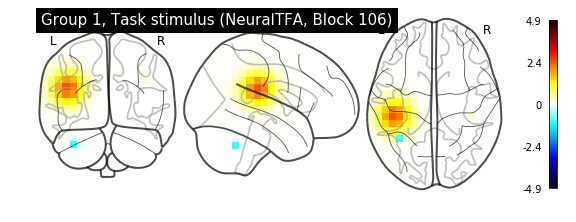

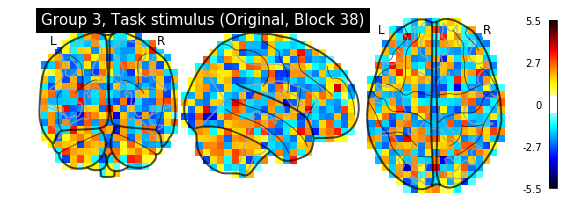

07/30/2019 13:02:09 Reconstruction Error (Frobenius Norm): 3.20043457e+02 out of 3.24801422e+02


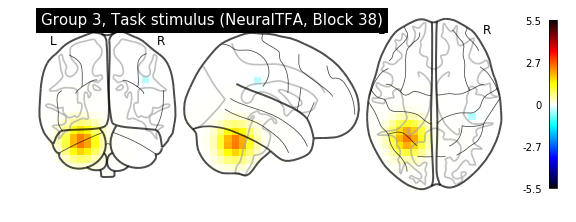

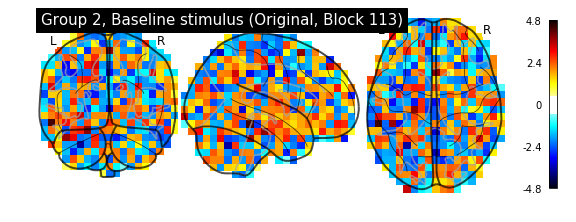

07/30/2019 13:02:13 Reconstruction Error (Frobenius Norm): 3.19262268e+02 out of 3.19445984e+02


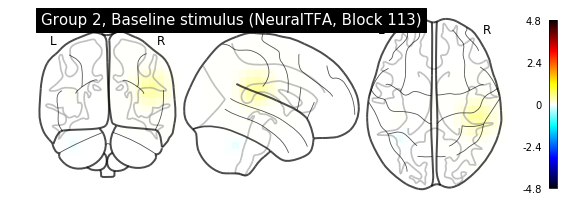

In [16]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=synthetic_multidist_labeler)
    dtfa.plot_reconstruction(b, labeler=synthetic_multidist_labeler)

In [17]:
dtfa.average_reconstruction_error(weighted=False)

07/30/2019 13:02:15 Average reconstruction error (MSE): 3.18852384e+02 +/- 8.37719977e-01
07/30/2019 13:02:15 Average data norm (Euclidean): 3.21228888e+02 +/- 2.61662119e+00
07/30/2019 13:02:15 Percent average reconstruction error: 99.265576 +/- 6.96362766e-01


(array([317.79309082, 317.6491394 , 317.30508423, 318.78286743,
        318.6463623 , 318.98214722, 319.384552  , 319.20101929,
        318.63119507, 318.98547363, 318.94564819, 319.10598755,
        318.35708618, 318.08035278, 319.53866577, 318.88058472,
        320.38140869, 317.85232544, 320.44195557, 319.36022949,
        319.51330566, 318.55041504, 318.00082397, 317.90063477,
        318.68597412, 318.6579895 , 318.00662231, 318.27536011,
        318.5786438 , 319.6758728 , 318.48855591, 318.72732544,
        317.85440063, 319.03948975, 318.83633423, 320.92098999,
        320.3664856 , 317.97897339, 320.04345703, 318.39855957,
        317.83792114, 317.48223877, 319.55685425, 318.25939941,
        319.98223877, 318.60150146, 318.30267334, 319.10928345,
        319.22860718, 319.52212524, 319.4152832 , 317.99893188,
        317.18121338, 318.37582397, 319.0776062 , 318.98498535,
        320.65447998, 319.03082275, 319.00921631, 318.9291687 ,
        318.82937622, 318.21112061, 319.

In [18]:
dtfa.average_reconstruction_error()

07/30/2019 13:02:16 Average reconstruction error (MSE): 9.94670231e-01
07/30/2019 13:02:16 Average data norm (Euclidean): 1.00211359e+00
07/30/2019 13:02:16 Percent average reconstruction error: 1.384879


(0.9946702310369016, 1.0021135872234135, 0.01384878968347922)